In [1]:
import torch
import glob

def data_sampler(path_1, path_2):
    #path_2 = r'C:\Users\wtana\Desktop\LiDAR_cm\syoumen\kaneko\200cm\txt\*'
    true_files = glob.glob(path_1)
    false_files = glob.glob(path_2)
    
    len_true = len(true_files)
    len_false = len(false_files)
    if len_true == 0 or len_false == 0:
        print('No data available')
        return 0,0

    true_list = []
    false_list = []

    for idx in range(32):
        s_num = []
        with open(true_files[idx],'r') as f:
            data = f.read().split('\n')
            for i in range(len(data)-1):
                s = data[i].split(' ')
                #print(i)
                s_num.append([float(s[0]),float(s[1]),float(s[2])])
        true_list.append([s_num])

    for idx in range(32):
        s_num = []
        with open(false_files[idx],'r') as f:
            data = f.read().split('\n')
            for i in range(len(data)-1):
                s = data[i].split(' ')
                s_num.append([float(s[0]),float(s[1]),float(s[2])])
        false_list.append([s_num])
    #len_true = len(true_list)
    #len_false = len(false_list)

    true_labels = torch.ones(len(true_list))
    false_labels = torch.zeros(len(false_list))

    #return true_list,false_list

    input_data = torch.cat((torch.Tensor(true_list),torch.Tensor(false_list)))
    labels = torch.cat((torch.Tensor(true_labels), torch.Tensor(false_labels)))
    return input_data.view(-1,3), labels.view(-1, 1)



In [10]:
from model import *
#from sampler import *
#from self_made import *

loss = []
Accu = []

batch_size = 64
num_points = 64
num_labels = 1
def main_():
    pointnet = PointNet(num_points, num_labels)

    new_param = pointnet.state_dict()
    new_param['main.0.main.6.bias'] = torch.eye(3, 3).view(-1)
    new_param['main.3.main.6.bias'] = torch.eye(batch_size, batch_size).view(-1)
    pointnet.load_state_dict(new_param)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(pointnet.parameters(), lr=0.001)

    loss_list = []
    accuracy_list = []

    for iteration in range(200):

        pointnet.zero_grad()
        input_data, labels = data_sampler(path_1='./normalize_txt/takuya/150cm/*',path_2='./normalize_txt/tree/*')
        #input_data, labels = data_sampler(batch_size, num_points)

        output = pointnet(input_data)
        output = nn.Sigmoid()(output)

        error = criterion(output, labels)
        error.backward()

        optimizer.step()

        with torch.no_grad():
            output[output > 0.5] = 1
            output[output < 0.5] = 0
            accuracy = (output==labels).sum().item()/batch_size

        loss.append(float(error.item()))
        Accu.append(float(accuracy))
        #if iteration % 10 == 0:

            #print('Iteration : {}   Loss : {}'.format(iteration, error.item()))
            #print('Iteration : {}   Accuracy : {}'.format(iteration, accuracy))
    torch.save(pointnet.state_dict(), './model_2.pth')
    return pointnet

In [11]:
pointnet = main_()
print("finished")

finished


In [15]:
model_params = torch.load('./model_2.pth')
model_params

OrderedDict([('main.0.main.0.main.0.weight',
              tensor([[-0.3471, -0.3459, -0.5685],
                      [ 0.4112,  0.1710, -0.2294],
                      [-0.4811, -0.2942,  0.3817],
                      [-0.5435, -0.1065,  0.2876],
                      [-0.2928,  0.4246, -0.4300],
                      [ 0.4226,  0.0195,  0.3771],
                      [-0.2554, -0.2210, -0.2578],
                      [-0.4382, -0.3888, -0.4885],
                      [-0.2043, -0.0748,  0.1011],
                      [-0.0080, -0.3477,  0.0343],
                      [-0.4963, -0.3659, -0.2562],
                      [ 0.2487,  0.3016,  0.5636],
                      [-0.3885,  0.2630, -0.0156],
                      [ 0.4424,  0.1632,  0.2250],
                      [-0.1918,  0.5062,  0.3132],
                      [ 0.5214, -0.4723,  0.0355],
                      [ 0.2934, -0.0752, -0.0446],
                      [ 0.5417,  0.5214, -0.1143],
                      [ 0.2275, -0.00

In [5]:
#モデルの保存を試みるよ
import torch
import torch.nn as nn
import torch.nn.functional as F

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.save()

TypeError: __init__() missing 2 required positional arguments: 'num_points' and 'num_labels'

In [21]:
input_data, labels = data_sampler(path_1='./normalize_txt/takuya/150cm/*',path_2='./normalize_txt/tree/*')

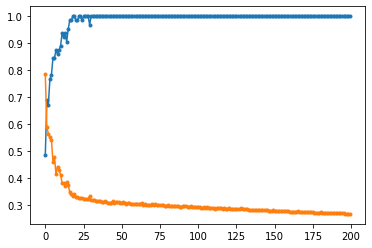

In [38]:
import matplotlib.pyplot as plt
x = range(0,len(Accu))
plt.plot(x,Accu,marker='.')
plt.plot(x,loss,marker='.')